In [1]:
#Impoerting libraries
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
sns.set(rc={'figure.figsize':(10,6)})

In [2]:
pd.pandas.set_option('display.max_columns',None)


In [3]:
car = pd.read_excel('Car_price.xlsx')

In [4]:
car.shape

(205, 26)

In [5]:
car.head(10)

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1.0,3.0,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548.0,dohc,four,130.0,mpfi,3.47,2.68,9.0,111.0,5000.0,21.0,27.0,13495.00
1,2.0,3.0,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548.0,dohc,four,130.0,mpfi,3.47,2.68,9.0,111.0,5000.0,21.0,27.0,16500.00
2,3.0,1.0,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823.0,ohcv,six,152.0,mpfi,2.68,3.47,9.0,154.0,5000.0,19.0,26.0,16500.00
3,4.0,2.0,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337.0,ohc,four,109.0,mpfi,3.19,3.40,10.0,102.0,5500.0,24.0,30.0,13950.00
4,5.0,2.0,audi 100ls,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824.0,ohc,five,136.0,mpfi,3.19,3.40,8.0,115.0,5500.0,18.0,22.0,17450.00
5,6.0,2.0,audi fox,gas,std,two,sedan,fwd,front,99.8,177.3,66.3,53.1,2507.0,ohc,five,136.0,mpfi,3.19,3.40,8.5,110.0,5500.0,19.0,25.0,15250.00
6,7.0,1.0,audi 100ls,gas,std,four,sedan,fwd,front,105.8,192.7,71.4,55.7,2844.0,ohc,five,136.0,mpfi,3.19,3.40,8.5,110.0,5500.0,19.0,25.0,17710.00
7,8.0,1.0,audi 5000,gas,std,four,wagon,fwd,front,105.8,192.7,71.4,55.7,2954.0,ohc,five,136.0,mpfi,3.19,3.40,8.5,110.0,5500.0,19.0,25.0,18920.00
8,9.0,1.0,audi 4000,gas,turbo,four,sedan,fwd,front,105.8,192.7,71.4,55.9,3086.0,ohc,five,131.0,mpfi,3.13,3.40,8.3,140.0,5500.0,17.0,20.0,23875.00
9,10.0,0.0,audi 5000s (diesel),gas,turbo,two,hatchback,4wd,front,99.5,178.2,67.9,52.0,3053.0,ohc,five,131.0,mpfi,3.13,3.40,7.0,160.0,5500.0,16.0,22.0,17859.17


In [6]:
car.tail(10)

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
195,196.0,-1.0,volvo 144ea,gas,std,four,wagon,rwd,front,104.3,188.8,67.2,57.5,3034.0,ohc,four,141.0,mpfi,3.78,3.15,9.5,114.0,5400.0,23.0,28.0,13415.0
196,197.0,-2.0,volvo 244dl,gas,std,four,sedan,rwd,front,104.3,188.8,67.2,56.2,2935.0,ohc,four,141.0,mpfi,3.78,3.15,9.5,114.0,5400.0,24.0,28.0,15985.0
197,198.0,-1.0,volvo 245,gas,std,four,wagon,rwd,front,104.3,188.8,67.2,57.5,3042.0,ohc,four,141.0,mpfi,3.78,3.15,9.5,114.0,5400.0,24.0,28.0,16515.0
198,199.0,-2.0,volvo 264gl,gas,turbo,four,sedan,rwd,front,104.3,188.8,67.2,56.2,3045.0,ohc,four,130.0,mpfi,3.62,3.15,7.5,162.0,5100.0,17.0,22.0,18420.0
199,200.0,-1.0,volvo diesel,gas,turbo,four,wagon,rwd,front,104.3,188.8,67.2,57.5,3157.0,ohc,four,130.0,mpfi,3.62,3.15,7.5,162.0,5100.0,17.0,22.0,18950.0
200,201.0,-1.0,volvo 145e (sw),gas,std,four,sedan,rwd,front,109.1,188.8,68.9,55.5,2952.0,ohc,four,141.0,mpfi,3.78,3.15,9.5,114.0,5400.0,23.0,28.0,16845.0
201,202.0,-1.0,volvo 144ea,gas,turbo,four,sedan,rwd,front,109.1,188.8,68.8,55.5,3049.0,ohc,four,141.0,mpfi,3.78,3.15,8.7,160.0,5300.0,19.0,25.0,19045.0
202,203.0,-1.0,volvo 244dl,gas,std,four,sedan,rwd,front,109.1,188.8,68.9,55.5,3012.0,ohcv,six,173.0,mpfi,3.58,2.87,8.8,134.0,5500.0,18.0,23.0,21485.0
203,204.0,-1.0,volvo 246,diesel,turbo,four,sedan,rwd,front,109.1,188.8,68.9,55.5,3217.0,ohc,six,145.0,idi,3.01,3.40,23.0,106.0,4800.0,26.0,27.0,22470.0
204,205.0,-1.0,volvo 264gl,gas,turbo,four,sedan,rwd,front,109.1,188.8,68.9,55.5,3062.0,ohc,four,141.0,mpfi,3.78,3.15,9.5,114.0,5400.0,19.0,25.0,22625.0


In [7]:
car.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    float64
 1   symboling         205 non-null    float64
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    float64
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    float64
 1

In [8]:
category = ['car_ID','symboling', 'CarName', 'fueltype', 'aspiration','doornumber', 'carbody', 'drivewheel', 'enginelocation', 'enginetype','cylindernumber', 'fuelsystem']
for i in category:
    car[i] = car[i].astype('category')

In [9]:
car.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   car_ID            205 non-null    category
 1   symboling         205 non-null    category
 2   CarName           205 non-null    category
 3   fueltype          205 non-null    category
 4   aspiration        205 non-null    category
 5   doornumber        205 non-null    category
 6   carbody           205 non-null    category
 7   drivewheel        205 non-null    category
 8   enginelocation    205 non-null    category
 9   wheelbase         205 non-null    float64 
 10  carlength         205 non-null    float64 
 11  carwidth          205 non-null    float64 
 12  carheight         205 non-null    float64 
 13  curbweight        205 non-null    float64 
 14  enginetype        205 non-null    category
 15  cylindernumber    205 non-null    category
 16  enginesize        205 non-

In [10]:
car.nunique()

car_ID              205
symboling             6
CarName             147
fueltype              2
aspiration            2
doornumber            2
carbody               5
drivewheel            3
enginelocation        2
wheelbase            53
carlength            75
carwidth             44
carheight            49
curbweight          171
enginetype            7
cylindernumber        7
enginesize           44
fuelsystem            8
boreratio            38
stroke               37
compressionratio     32
horsepower           59
peakrpm              23
citympg              29
highwaympg           30
price               189
dtype: int64

In [11]:
car.isnull().sum()

car_ID              0
symboling           0
CarName             0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64

<AxesSubplot:>

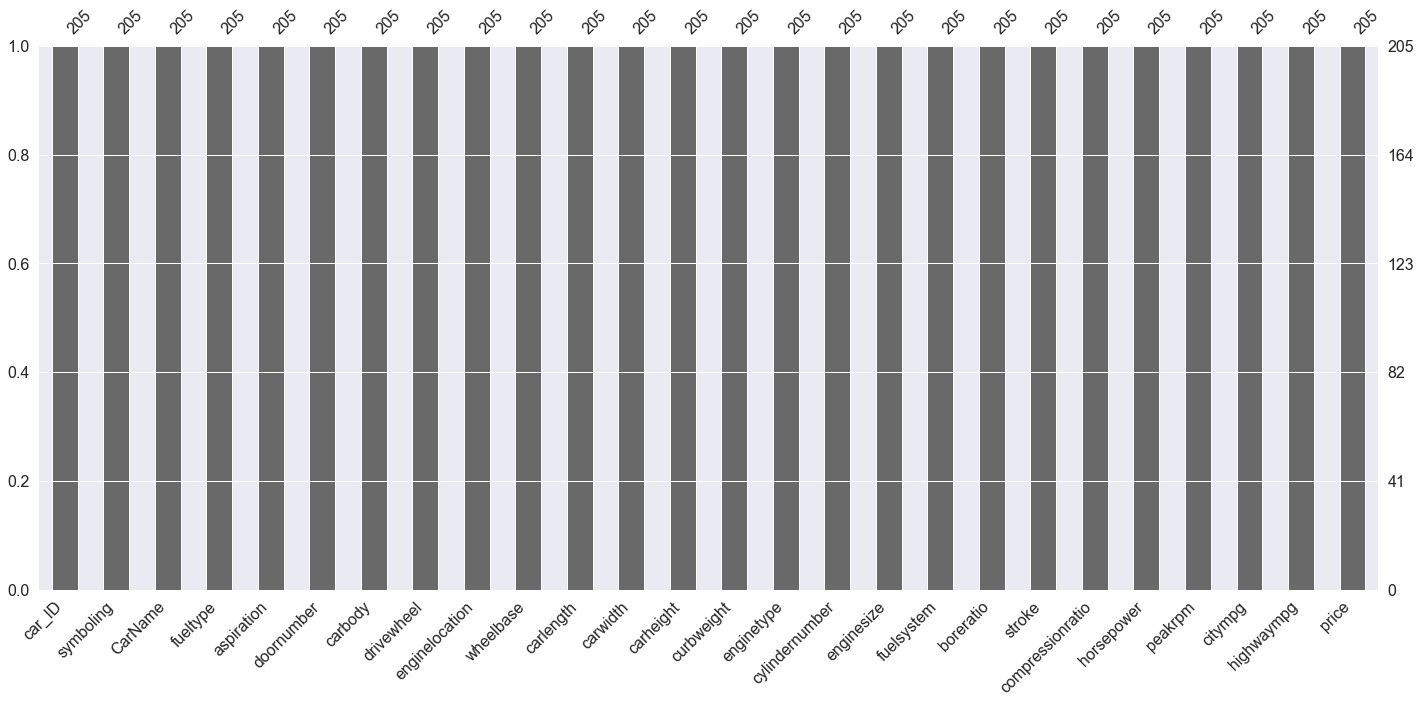

In [12]:
msno.bar(car)

In [13]:
numeric = ['wheelbase','carlength', 'carwidth', 'carheight', 'curbweight', 'enginesize', 'boreratio', 'stroke','compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg','price']

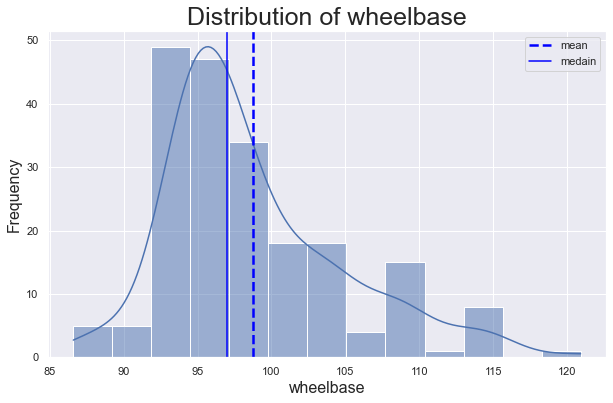

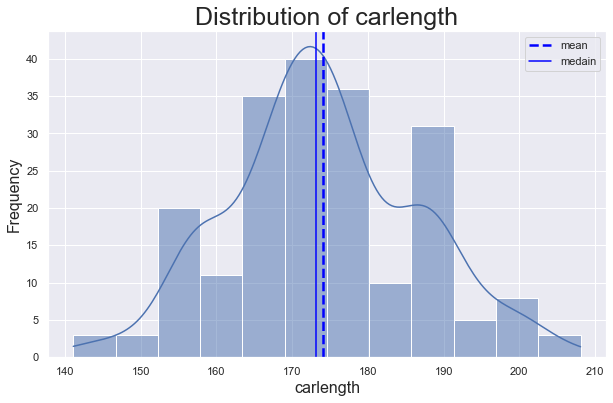

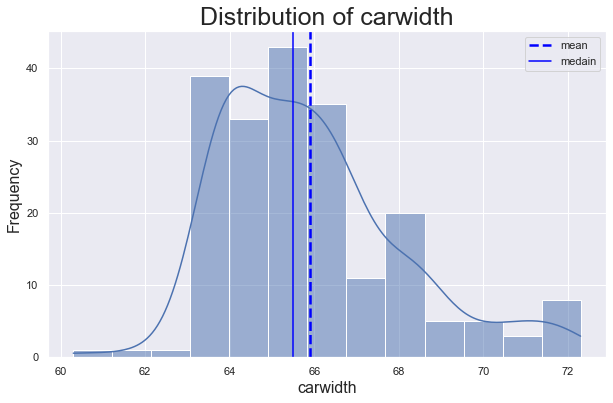

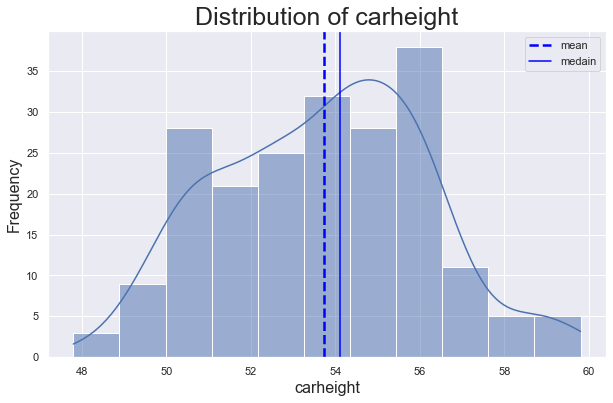

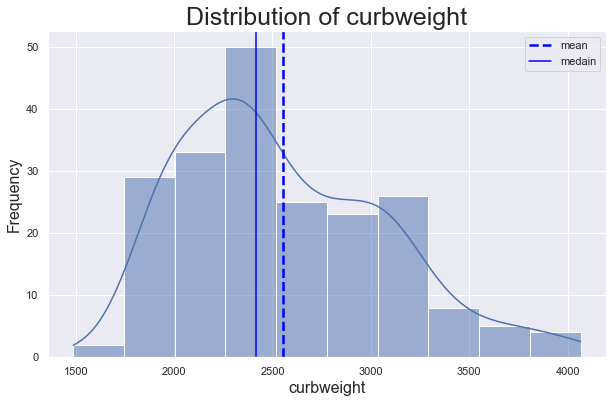

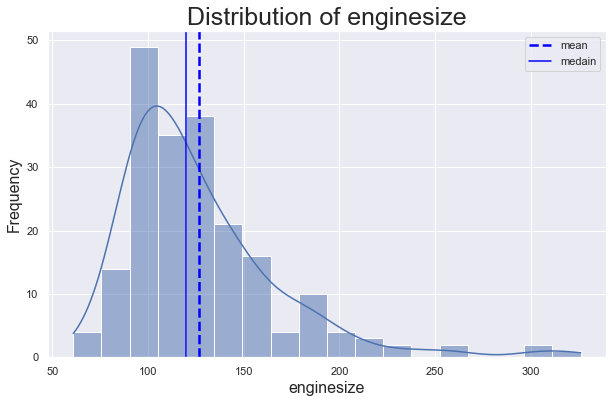

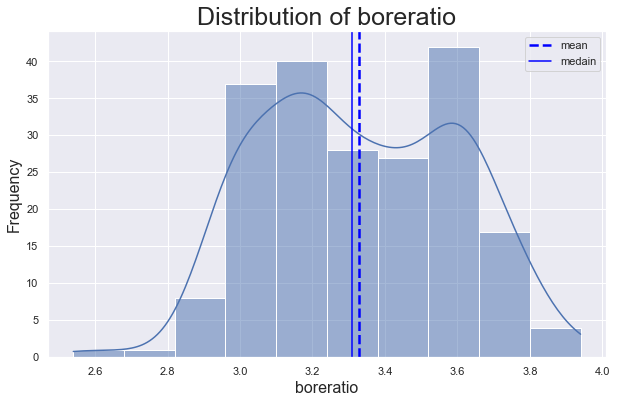

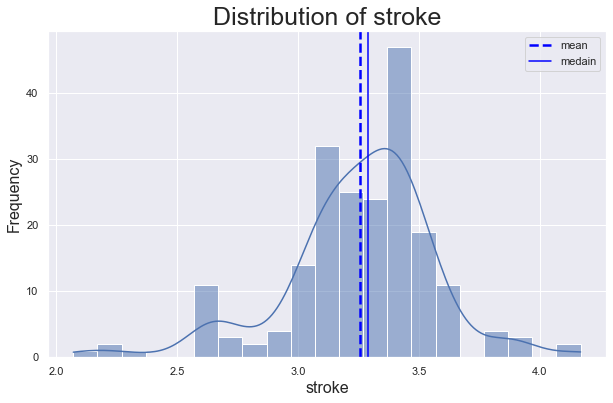

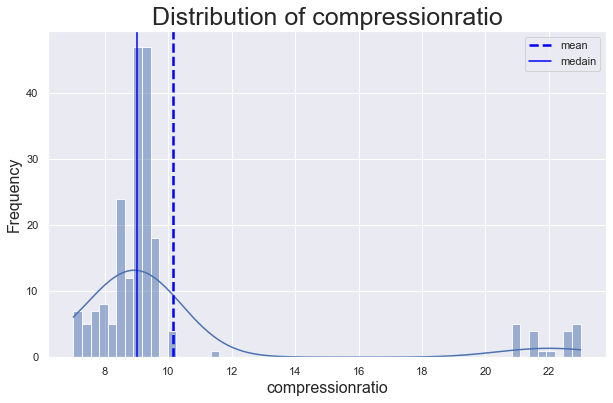

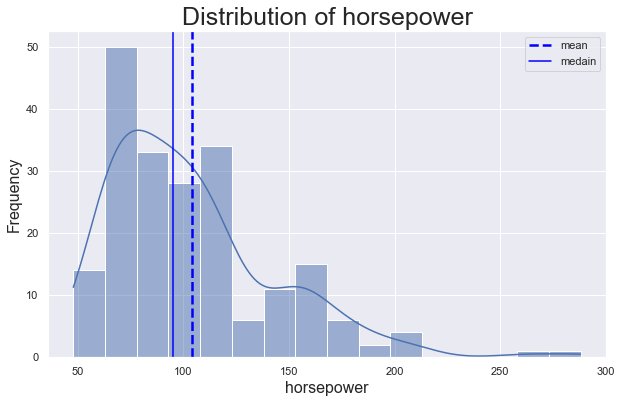

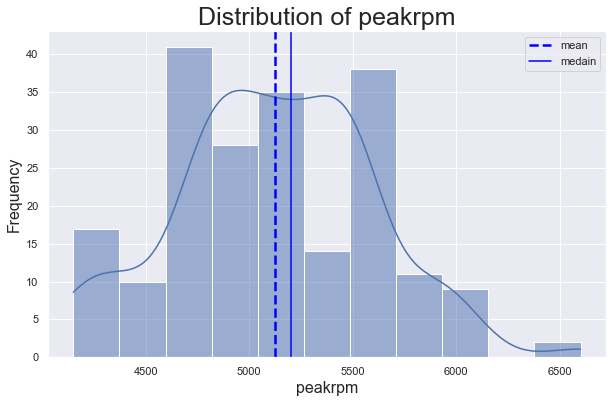

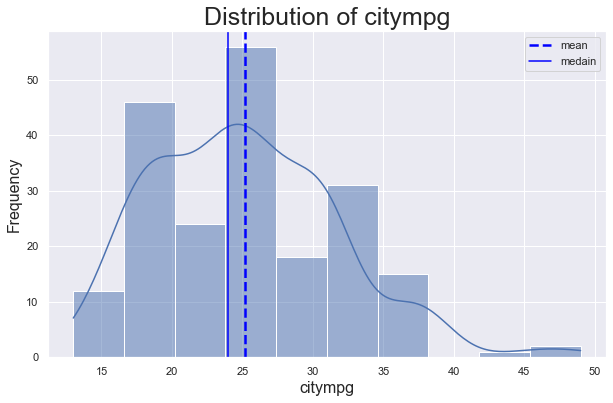

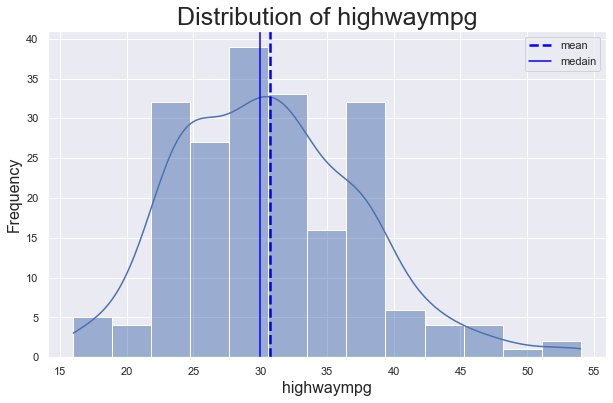

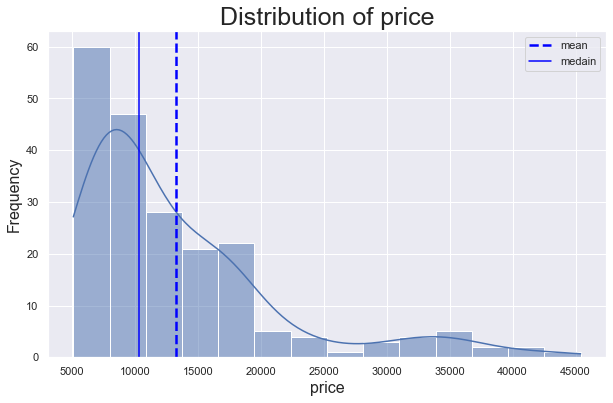

In [14]:
for i in numeric:
    fig, ax = plt.subplots(1,1)
    sns.histplot(car[i],kde=True,edgecolor = 'white')
    plt.title('Distribution of %s'%(i), fontsize=25)
    plt.axvline(x=car[i].mean(),ls='--',lw=2.5, color='blue',label='mean')
    plt.axvline(x=car[i].median(), color='blue',label='medain')
    plt.legend()
    plt.xlabel(i, fontsize=16)
    plt.ylabel('Frequency', fontsize=16)

C:\Users\Rhytham\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


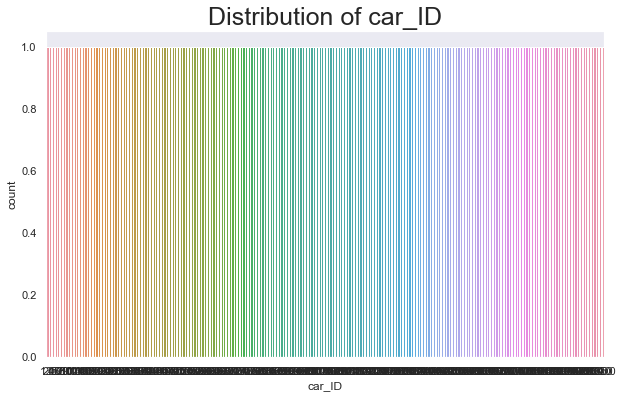

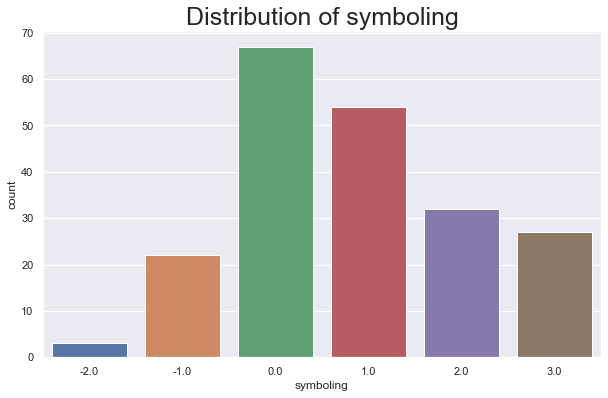

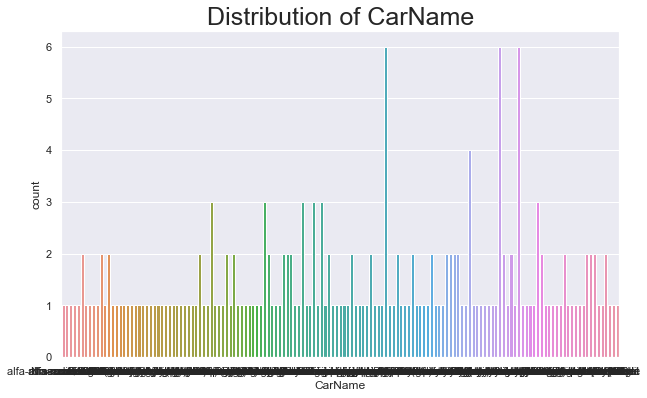

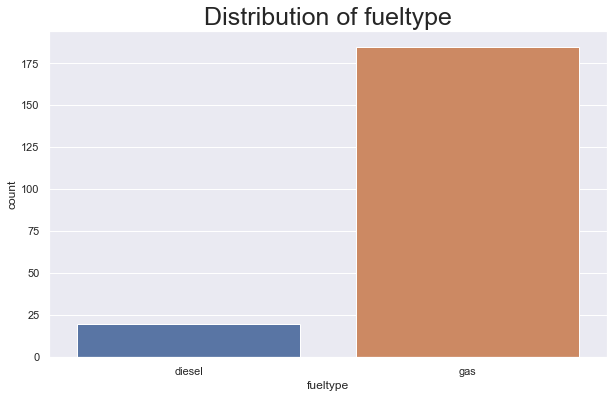

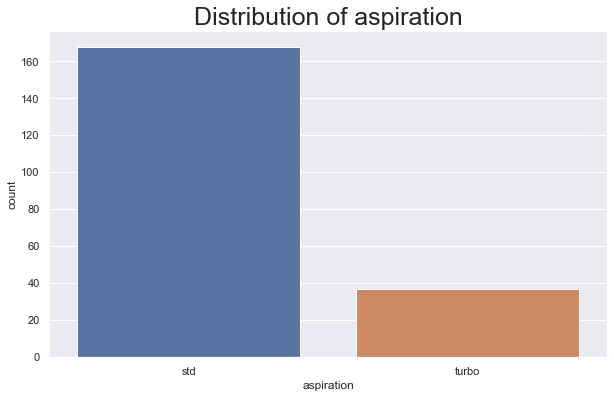

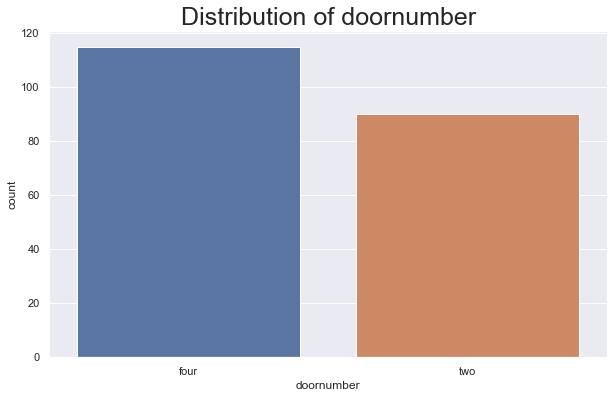

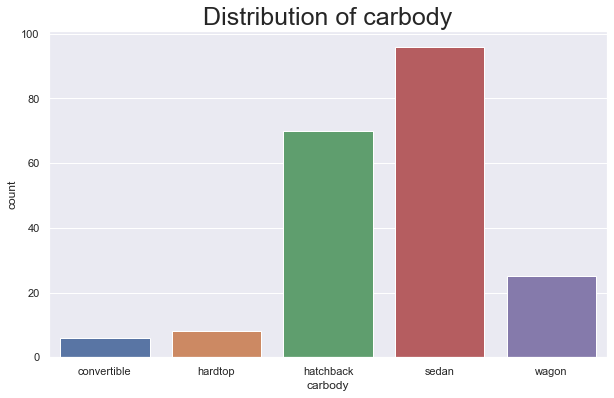

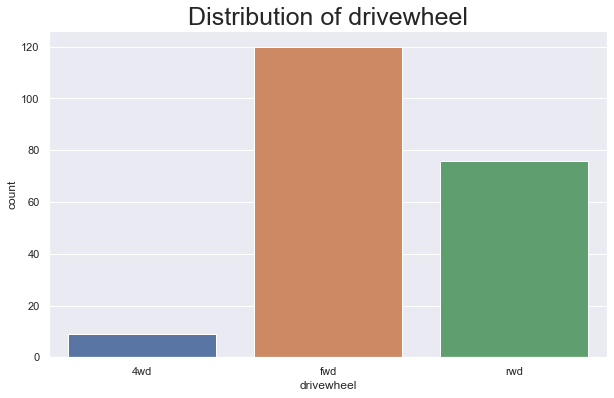

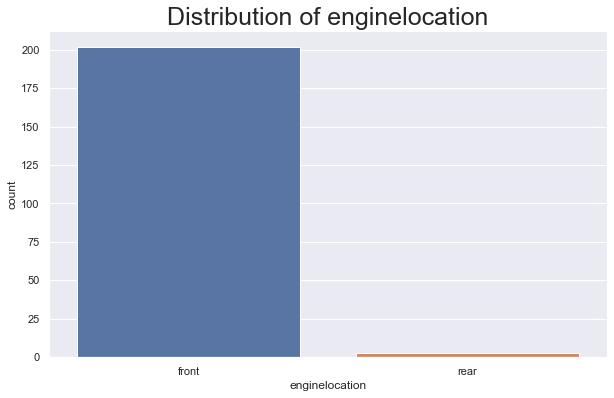

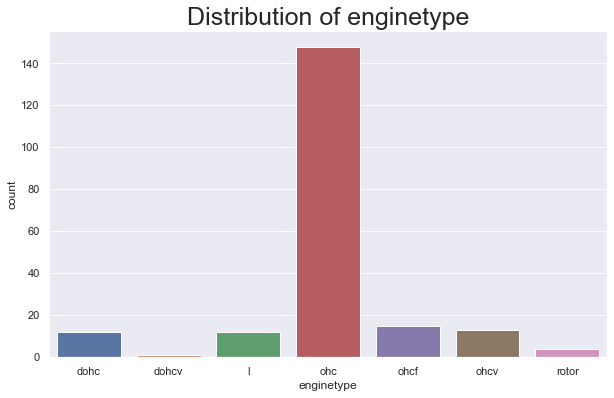

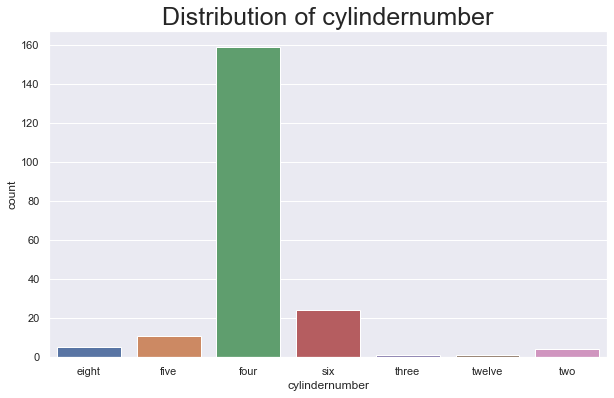

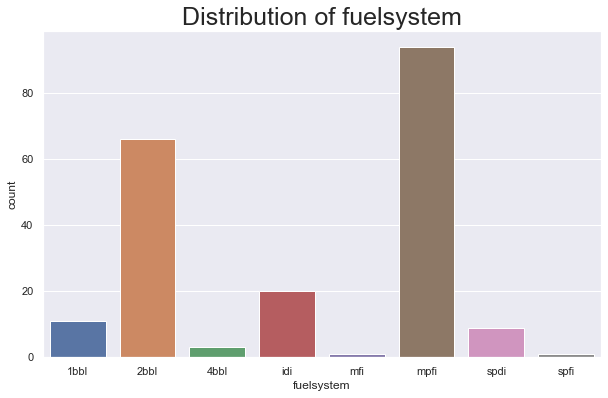

In [15]:
for i in category:
    fig, ax = plt.subplots(1,1)
    sns.countplot(car[i])
    plt.title('Distribution of %s'%(i), fontsize=25)
    plt.show()

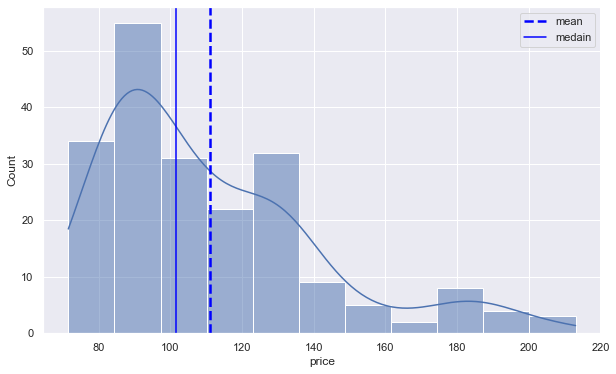

In [16]:
#Sqrt
sqrt_price = np.sqrt(car['price'])
sns.histplot(sqrt_price,kde=True,edgecolor = 'white')
plt.axvline(x=sqrt_price.mean(),ls='--',lw=2.5, color='blue',label='mean')
plt.axvline(x=sqrt_price.median(), color='blue',label='medain')
plt.legend()

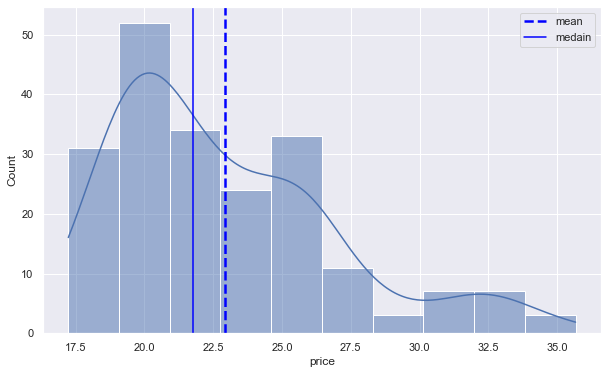

In [17]:
#cbrt
cbrt_price = np.cbrt(car['price'])
sns.histplot(cbrt_price,kde=True,edgecolor = 'white')
plt.axvline(x=cbrt_price.mean(),ls='--',lw=2.5, color='blue',label='mean')
plt.axvline(x=cbrt_price.median(), color='blue',label='medain')
plt.legend()

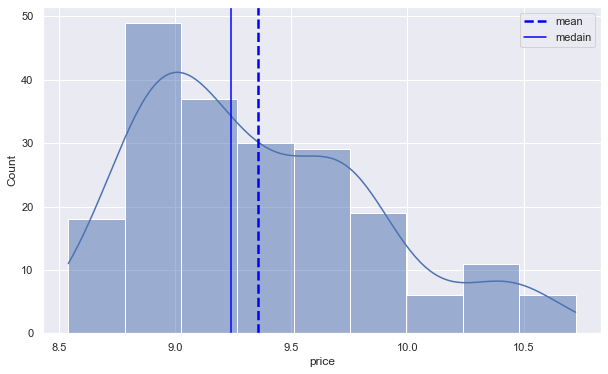

In [18]:
#log
log_price = np.log(car['price'])
sns.histplot(log_price,kde=True,edgecolor = 'white')
plt.axvline(x=log_price.mean(),ls='--',lw=2.5, color='blue',label='mean')
plt.axvline(x=log_price.median(), color='blue',label='medain')
plt.legend()

In [19]:
#Box cox
from scipy.stats import boxcox
car.insert(len(car.columns), 'price_boxcox', boxcox(car.iloc[:, 25])[0])

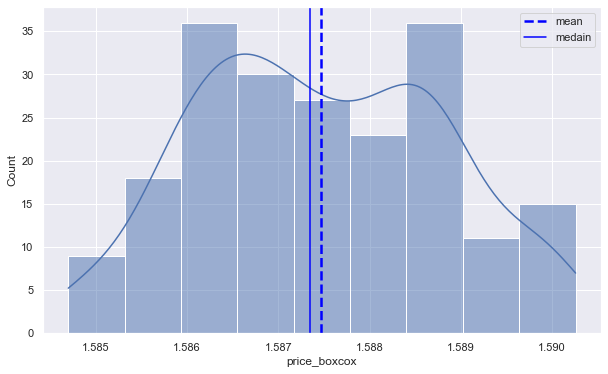

In [20]:
sns.histplot(car['price_boxcox'],kde=True,edgecolor = 'white')
plt.axvline(x=car['price_boxcox'].mean(),ls='--',lw=2.5, color='blue',label='mean')
plt.axvline(x=car['price_boxcox'].median(), color='blue',label='medain')
plt.legend()